In [2]:
# import useful pakages
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy.optimize import linprog
!pip install PuLP
from pulp import * # A useful pakage for optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 40.0 MB/s eta 0:00:00


# Eample 1

A furniture company produces a variety of products. One department specializes in wood tables, chairs, and bookcases. These are made using three resources labor, wood, and machine time. The department has 60 hours of labor available each day, 16 hours of machine time, and 400 board feet of wood. A consultant has developed a linear programming model for the department.

variables:

x1= quantity of tables

x2= quantity of chairs

x3= quantity of bookcases

Objective Function:

Maimize Profit: Z = 40*x1+30*x2+45*x3

Subjected to:

labor: 2*x1 + 1*x2 + 2.5*x3 <= 60 Hours

Machine: 0.8*x1 + 0.6*x2 + 1.0*x3 <= 16 Hours

Wood: 30*x1 + 20*x2 + 30*x3 <= 400 board-feet

Tables: x1>=10 board-feet

x1, x2, x3 >= 0



In [ ]:
# Create the problem variable to contain the problem data
model = LpProblem("FurnitureProblem", LpMaximize)

In [ ]:
# Create 3 variables tables, chairs, and bookcases
# cat : category --> (Integer)/(Continuous)
x1 = LpVariable(name="tables", lowBound=0, upBound=None, cat='LpInteger')
x2 = LpVariable("chairs", 0, None, cat='LpInteger') 
x3 = LpVariable("bookcases", 0, None, cat='LpInteger')

In [ ]:
# Create maximize objective function
model += 40 * x1 + 30 * x2 + 45 * x3

In [ ]:
# Create three constraints
model += 2 * x1 + 1 * x2 + 2.5 * x3 <= 60, "Labour"
model += 0.8 * x1 + 0.6 * x2 + 1.0 * x3 <= 16, "Machine"
model += 30 * x1 + 20 * x2 + 30 * x3 <= 400, "wood"
model += x1 >= 10, "tables"

In [ ]:
# The problem is solved using PuLP's choice of Solver
model.solve()

# Each of the variables is printed with it's resolved optimum value
for v in model.variables():
    print(v.name, "=", v.varValue)

bookcases = 0.0
chairs = 5.0
tables = 10.0


# Example 2

Maximize z = 2x1 + x2 + 3x3

Subjected to:

x1 + x2 + 3x3 ≤ 17

3x1 + 2x2 + 2x3 ≤ 11

x1, x2, x3 : integer

In [ ]:
model = LpProblem("example2", LpMaximize)
x1 = LpVariable( "x1", lowBound=0, upBound=None, cat='Integer')
x2 = LpVariable( "x2",0, None, cat='Integer') 
x3 = LpVariable( "x3",0, None, cat='Integer')
model += 2 * x1 + 1 * x2 + 3 * x3
model += 1 * x1 + 1 * x2 + 3 * x3 <= 17
model +=3 * x1 + 2 * x2 + 2 * x3 <= 11

model.solve()

# Each of the variables is printed with it's resolved optimum value
for v in model.variables():
    print(v.name, "=", v.varValue)

x1 = 0.0
x2 = 0.0
x3 = 5.0


# Example 3
There are six cities (cities 1–6) in Kilroy County. The county must determine where to
build fire stations. The county wants to build the minimum number of fire stations needed
to ensure that at least one fire station is within 15 minutes of each city.
xi(1 if a fire station is built in city or 0 otherwise)

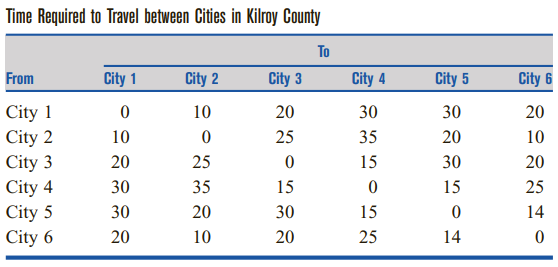

minimize z = x1 + x2 + x3 + x4 + x5 + x6

s.t. x1 + x2 >= 1 (City 1 constraint; To ensure that at least one fire station is within 15 minutes of city 1)

In a similar fashion, we obtain constraints for cities 3–6

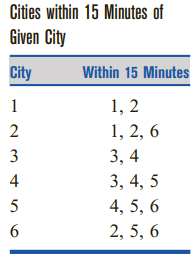

s.t. x1 + x2 + x6 >= 1 (City 2 constraint)

s.t. x3 + x4 >= 1 (City 3 constraint)

s.t. x3 + x4 + x5 >= 1 (City 4 constraint)

s.t. x4 + x5 + x6 >= 1 (City 5 constraint)

s.t. x2 + x5 + x6 >= 1 (City 6 constraint)

xi : 0 or 1 (i  1, 2, 3, 4, 5, 6)

In [ ]:
model = LpProblem("example3", LpMinimize) # minimization
x1 = LpVariable(name="city1", lowBound=0, upBound=None, cat='Binary')# binary Category: xi: 0/1 (i=1,..,m)
x2 = LpVariable("city2", 0, None, cat='Binary') 
x3 = LpVariable("city3", 0, None, cat='Binary')
x4 = LpVariable("city4", 0, None, cat='Binary')
x5 = LpVariable("city5", 0, None, cat='Binary')
x6 = LpVariable("city6", 0, None, cat='Binary')
model += x1 + x2 + x3 + x4 + x5 + x6
model += x1 + x2 >= 1
model +=x1 + x2 + x6 >= 1
model +=x3 + x4 >= 1
model += x3 + x4 + x5 >= 1
model +=x4 + x5 + x6 >= 1
model +=x2 + x5 + x6 >= 1
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)

city1 = 0.0
city2 = 1.0
city3 = 0.0
city4 = 1.0
city5 = 0.0
city6 = 0.0


# Example 4
Dorian Auto has a 20,000 dollars advertising budget. Dorian can purchase full-page ads in two
magazines: Inside Jocks (IJ) and Family Square (FS). An exposure occurs when a person
reads a Dorian Auto ad for the first time. The number of exposures generated by each
ad in IJ is as follows: ads 1–6, 10,000 exposures; ads 7–10, 3,000 exposures; ads
11–15, 2,500 exposures; ads 16, 0 exposures. For example, 8 ads in IJ would generate
6(10,000)  2(3,000)  66,000 exposures. The number of exposures generated by each
ad in FS is as follows: ads 1–4, 8,000 exposures; ads 5–12, 6,000 exposures; ads 13–15,
2,000 exposures; ads 16, 0 exposures. Thus, 13 ads in FS would generate 4(8,000) + 8(6,000) + 1(2,000) = 82,000 exposures. Each full-page ad in either magazine costs
$1,000. Assume there is no overlap in the readership of the two magazines. Formulate an
IP to maximize the number of exposures that Dorian can obtain with limited advertising
funds.

x1 : number of IJ ads yielding 10,000 exposures

x2 : number of IJ ads yielding 3,000 exposures

x3 : number of IJ ads yielding 2,500 exposures

y1 : number of FS ads yielding 8,000 exposures

y2 : number of FS ads yielding 6,000 exposures

y3 : number of FS ads yielding 2,000 exposures

Maximize z = 10x1 + 3x2 + 2.5x3 + 8y1 + 6y2 + 2y3

st.

x1 + x2 + x3 + y1 + y2 + y3 <= 20

x1 <= 6

x2 <= 4

x3 <= 5

y1 <= 4

y2 <= 8

y3 <= 3

xi , yi >= 0 and integer

In [ ]:
model = LpProblem("example4", LpMaximize) 
x1 = LpVariable(name="IJ10000", lowBound=0, upBound=None, cat='Integer')
x2 = LpVariable("IJ3000", 0, None, cat='Integer') 
x3 = LpVariable("IJ2500", 0, None, cat='Integer')
y1 = LpVariable("FS8000", 0, None, cat='Integer')
y2 = LpVariable("FS6000", 0, None, cat='Integer')
y3 = LpVariable("FS2000", 0, None, cat='Integer')
model +=10*x1 + 3*x2 + 2.5*x3 + 8*y1 + 6*y2 + 2*y3
model += x1 + x2 + x3 + y1 + y2 + y3 <= 20
model +=x1 <= 6
model +=x2 <= 4
model +=x3 <= 5
model +=y1 <= 4
model +=y2 <= 8
model +=y3 <= 3
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)

FS2000 = 0.0
FS6000 = 8.0
FS8000 = 4.0
IJ10000 = 6.0
IJ2500 = 0.0
IJ3000 = 2.0


# **Branch and bound / Scipy**

# Example 5



Maximize Z = 5x1 +  4x2

st.

2x1 + 3x2 <= 12

2x1 + x2 <= 6

xi >=0 ; i=1,2

In [4]:
import numpy as np
from scipy.optimize import linprog

c = np.array([-5.0, -4.0])

A_ub = np.array(
    [[2.0, 3.0],
     [2.0, 1.0]]
)

b_ub = np.array([12.0, 6.0])

sol_relaxed = linprog(c, A_ub=A_ub, b_ub=b_ub)
print(sol_relaxed)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -19.5
              x: [ 1.500e+00  3.000e+00]
            nit: 2
          lower:  residual: [ 1.500e+00  3.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-7.500e-01 -1.750e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


In [ ]:
sol_int = linprog(c, A_ub=A_ub, b_ub=b_ub, integrality=np.ones(2)) #integrality: 0:continuous vars or 1:integer vars
print(sol_int)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -18.0
              x: [ 2.000e+00  2.000e+00]
            nit: -1
          lower:  residual: [ 2.000e+00  2.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 2.000e+00 -8.882e-16]
                 marginals: [ 0.000e+00  0.000e+00]
 mip_node_count: 1
 mip_dual_bound: -18.0
        mip_gap: 0.0


# first branch

P1: Original problem with new constraint x₁ ≤ 1.

P2: Original problem with new constraint x₁ ≥ 2.

In [6]:
# P1:
A_ub_p1 = np.vstack((A_ub, np.atleast_2d([1.0, 0.0]))) #np.atleast_2d: converts array to a 2d matrix
b_ub_p1 = np.append(b_ub, np.floor(sol_relaxed.x[0]))

# P2:
A_ub_p2 = np.vstack((A_ub, np.atleast_2d([-1.0, 0.0])))
b_ub_p2 = np.append(b_ub, -np.ceil(sol_relaxed.x[0]))


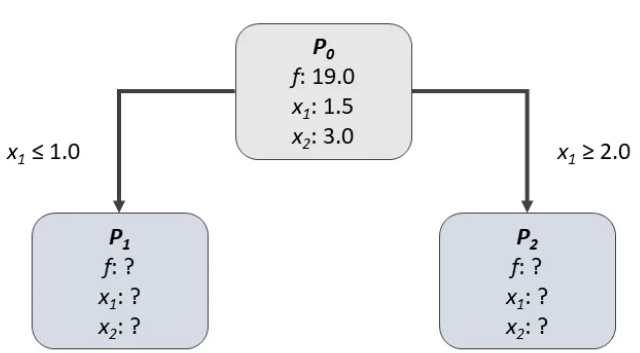

In [7]:
sol_p1 = linprog(c, A_ub=A_ub_p1, b_ub=b_ub_p1)
print(sol_p1)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -18.333333333333336
              x: [ 1.000e+00  3.333e+00]
            nit: 0
          lower:  residual: [ 1.000e+00  3.333e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  6.667e-01  0.000e+00]
                 marginals: [-1.333e+00 -0.000e+00 -2.333e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


In [8]:
sol_p2 = linprog(c, A_ub=A_ub_p2, b_ub=b_ub_p2)
print(sol_p2)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -18.0
              x: [ 2.000e+00  2.000e+00]
            nit: 0
          lower:  residual: [ 2.000e+00  2.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 2.000e+00  0.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -4.000e+00 -3.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


# second branch

P3: P1 with new constraint x_2 ≤ 3.

P4: P1 with new constraint x_2 ≥ 4.

In [9]:
# P3:
A_ub_p3 = np.vstack((A_ub_p1, np.atleast_2d([0.0, 1.0])))
b_ub_p3 = np.append(b_ub_p1, np.floor(sol_p1.x[1]))

# P4:
A_ub_p4 = np.vstack((A_ub_p1, np.atleast_2d([0.0, -1.0])))
b_ub_p4 = np.append(b_ub_p1, -np.ceil(sol_p1.x[1]))

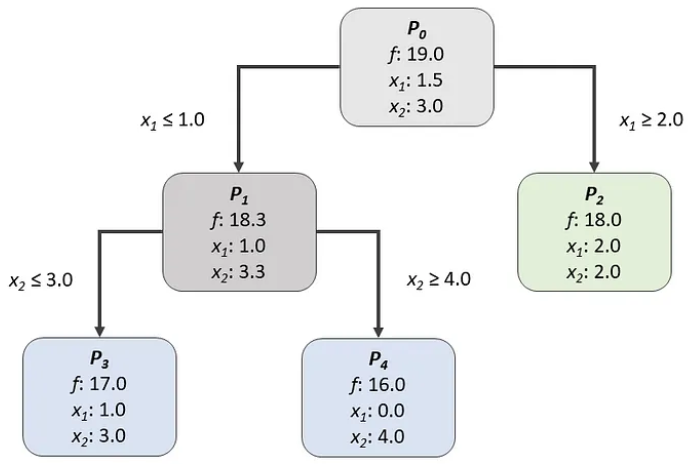

In [10]:
sol_p3 = linprog(c, A_ub=A_ub_p3, b_ub=b_ub_p3)
print(sol_p3)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -17.0
              x: [ 1.000e+00  3.000e+00]
            nit: 0
          lower:  residual: [ 1.000e+00  3.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.000e+00  1.000e+00  0.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -0.000e+00 -5.000e+00 -4.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


In [11]:
sol_p4 = linprog(c, A_ub=A_ub_p4, b_ub=b_ub_p4)
print(sol_p4)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -16.0
              x: [-0.000e+00  4.000e+00]
            nit: 0
          lower:  residual: [-0.000e+00  4.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  2.000e+00  1.000e+00  0.000e+00]
                 marginals: [-2.500e+00 -0.000e+00 -0.000e+00 -3.500e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0
